
# Smart Agricultural Practices using Machine Learning

## Project Overview

In this Jupyter Notebook, we explore the application of Machine Learning techniques to enhance agricultural practices and improve crop management. The project focuses on two main components:

1. Crop Recommendation System: Recommending the most suitable crops for cultivation based on various environmental and soil factors. This system aims to assist farmers in making informed decisions about what crops to grow on their land, thereby optimizing yield and resource utilization.

2. Prediction of Crop Health: Predicting the health of crops by analyzing the contents of pesticides used. By leveraging Machine Learning, we aim to create a model that can accurately assess the health status of crops based on pesticide information. This predictive capability can aid farmers in early detection of crop diseases and help prevent potential yield loss.

## Components

### Crop Recommendation System

The Crop Recommendation System is designed to provide personalized recommendations for crop selection based on the following factors:

- Soil Type
- Climate Conditions (Temperature, Humidity, Rainfall)
- Pesticide Usage History
- Previous Crop Cycles

By analyzing historical data and utilizing Machine Learning algorithms, we aim to create a model that suggests the most suitable crops for cultivation on a given plot of land, taking into account both environmental and historical information.

### Prediction of Crop Health

The Prediction of Crop Health component involves the development of a predictive model that assesses the health of crops based on the contents of pesticides used. The model takes into consideration factors such as:


- Insect Count
- Pesticide Use
- Soil Type
- Season

Through data analysis and predictive modeling, we intend to provide farmers with insights into the potential health risks associated with specific pesticide usage, helping them make more informed decisions and mitigate risks to crop health.

## Conclusion

By integrating Machine Learning into the realm of agriculture, we aim to enhance decision-making for farmers, optimize resource utilization, and contribute to sustainable and efficient agricultural practices. The Crop Recommendation System and the Prediction of Crop Health components together form an innovative approach towards Smart Agricultural Practices, offering valuable insights and tools for the modern agricultural landscape.


## 1.) CROP RECOMMENDATION SYSTEM 

## Motivation

Precision agirculture is in trend nowadays. Precision agriculture is a modern farming technique that uses the data of soil charachteristics, soil types, crop yield data, weather conditions and suggests the farmers with the most optimal crop to grow in their farms for maximum yield and profit. This technique can reduce the crop failures and will help the farmers to take informed decision about their farming strategy.

In order to mitigate the agrarian crisis in the current status quo, there is a need for better recommendation systems to alleviate the crisis by helping the farmers to make an informed decision before starting the cultivation of crops.

# Goal 
**To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation**

# About the data

The data used in this project is made by augmenting and combining various publicly available datasets of India like weather, soil, etc. This data is relatively simple with very few but useful features unlike the complicated features affecting the yield of the crop.

The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop. 

In [110]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [111]:
df = pd.read_csv('Crop_recommendation.csv')

In [112]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [113]:
df.size

17600

In [114]:
print('Dataset has {} rows '.format(df.shape[0]))
print('Dataset has {} columns '.format(df.shape[1]))

Dataset has 2200 rows 
Dataset has 8 columns 


### Dataset Columns

In [115]:
print('Following are the Headers of columns :',df.columns.tolist())

Following are the Headers of columns : ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


### Crops included in Dataset 

In [116]:
df.rename(columns={'label': 'crops'}, inplace=True)
df['crops'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [117]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crops           object
dtype: object

In [118]:
df['crops'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crops, dtype: int64

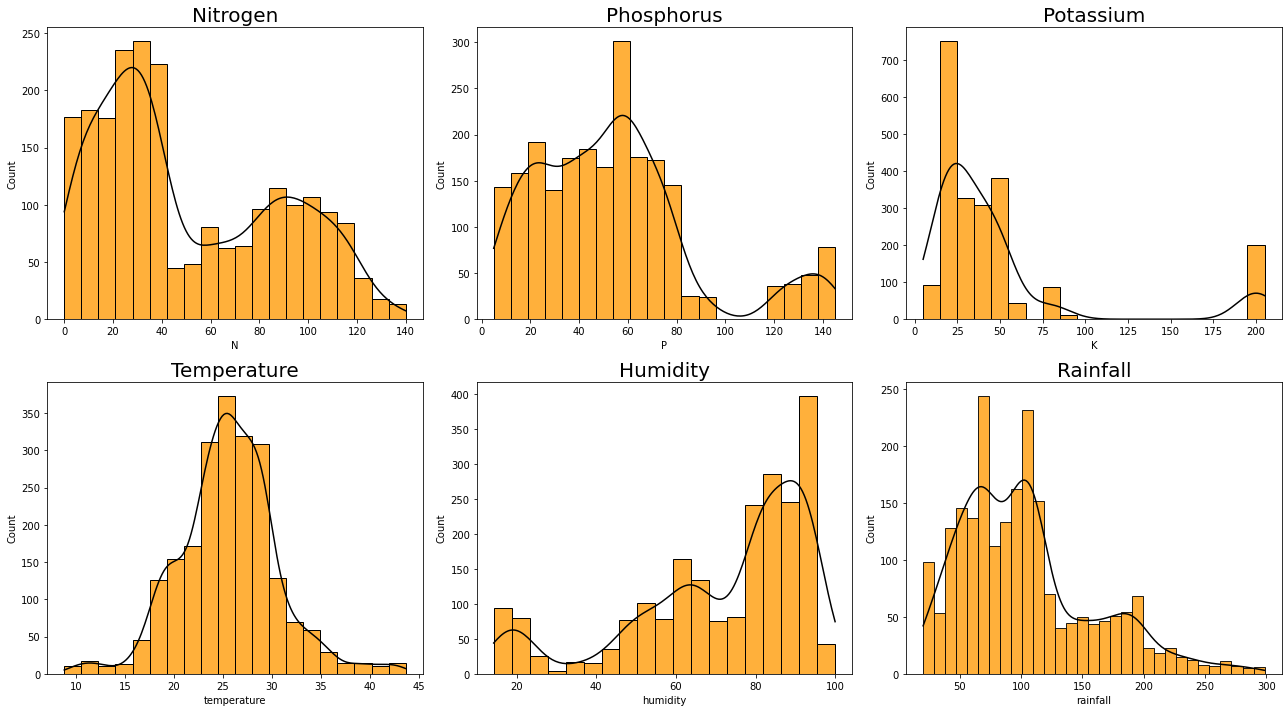

In [119]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot Nitrogen
sns.histplot(x=df['N'], bins=20, kde=True, edgecolor="black", color='black', facecolor='#ffb03b', ax=axes[0, 0])
axes[0, 0].set_title("Nitrogen", size=20)

# Plot Phosphorus
sns.histplot(x=df['P'], bins=20, color='black', edgecolor='black', kde=True, facecolor='#ffb03b', ax=axes[0, 1])
axes[0, 1].set_title("Phosphorus", size=20)
axes[0, 1].set_xticks(range(0, 150, 20))

# Plot Potassium
sns.histplot(x=df['K'], bins=20, kde=True, facecolor='#ffb03b', edgecolor='black', color='black', ax=axes[0, 2])
axes[0, 2].set_title("Potassium", size=20)

# Plot Temperature
sns.histplot(x=df['temperature'], bins=20, kde=True, edgecolor="black", color='black', facecolor='#ffb03b', ax=axes[1, 0])
axes[1, 0].set_title("Temperature", size=20)

# Plot Humidity
sns.histplot(x=df['humidity'], color='black', facecolor='#ffb03b', kde=True, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title("Humidity", size=20)

# Plot Rainfall
sns.histplot(x=df['rainfall'], color='black', facecolor='#ffb03b', kde=True, edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_title("Rainfall", size=20)

# Adjust layout
plt.tight_layout()
plt.show()


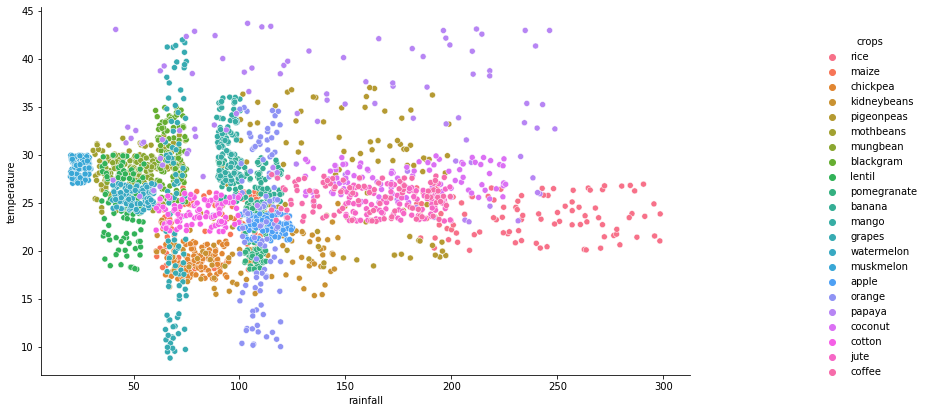

In [120]:
g = sns.relplot(x='rainfall', y='temperature', data=df, kind='scatter', hue='crops', height=5)
g.fig.set_size_inches(14, 6)  # Set the figure size for the FacetGrid
plt.show()


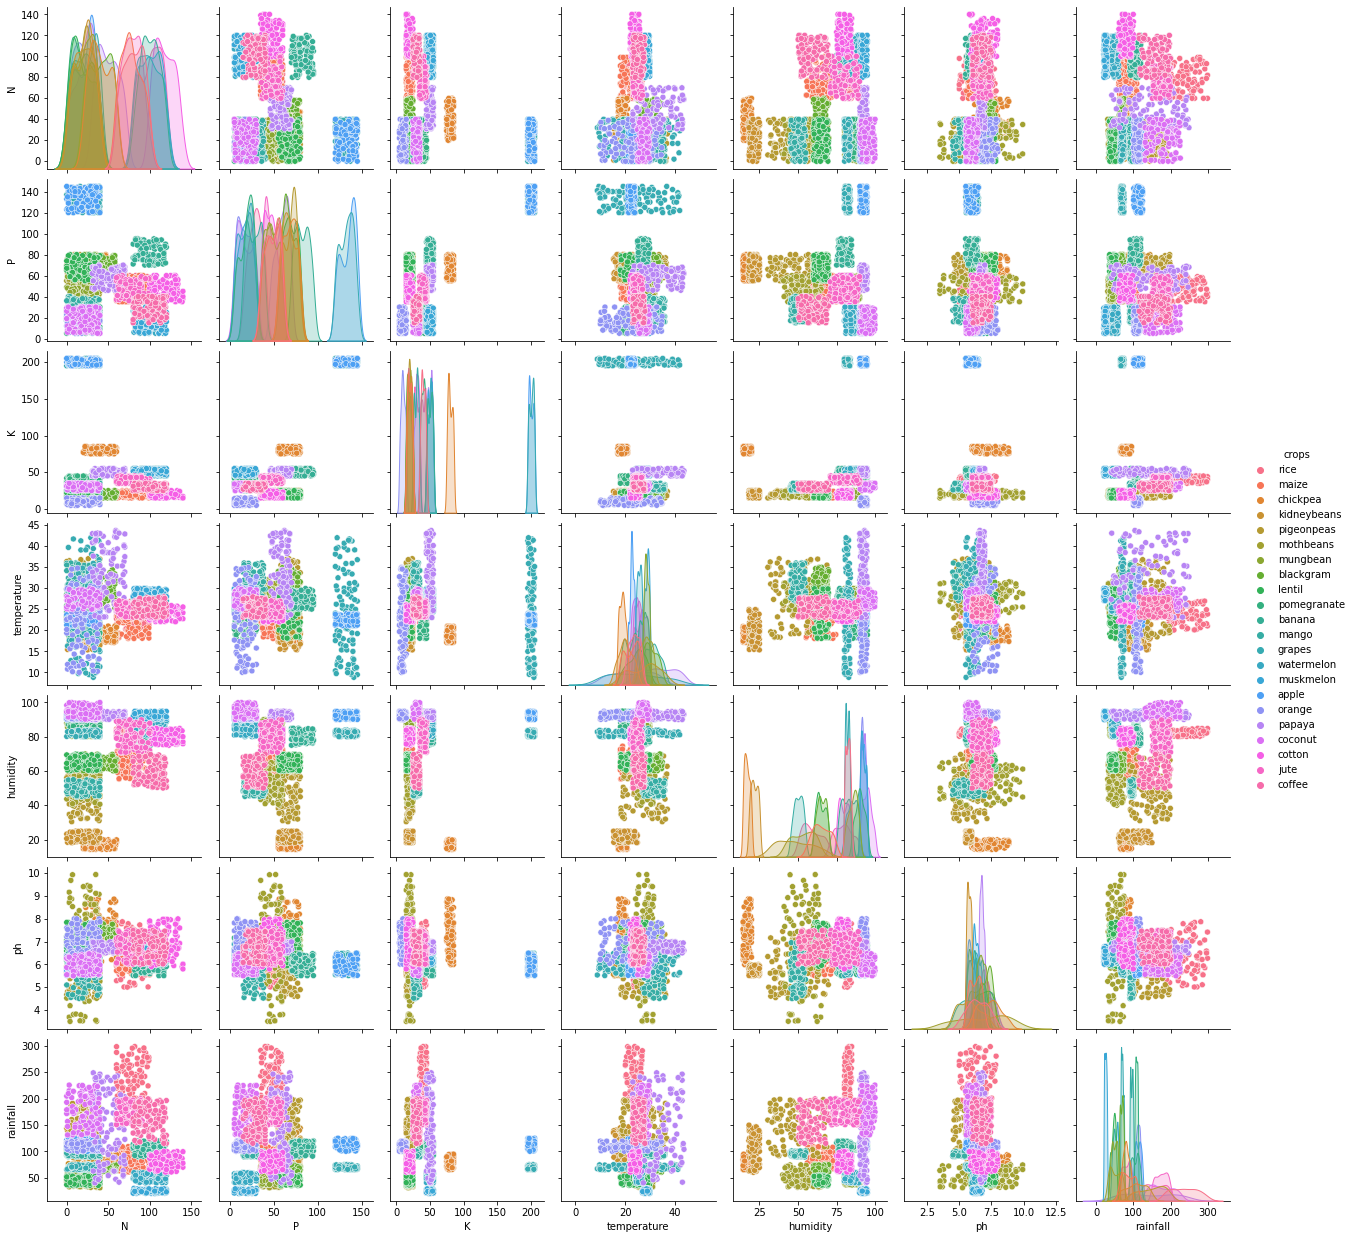

In [121]:
sns.pairplot(data=df,hue='crops')
plt.show()

### Outlier Detection using Graphs

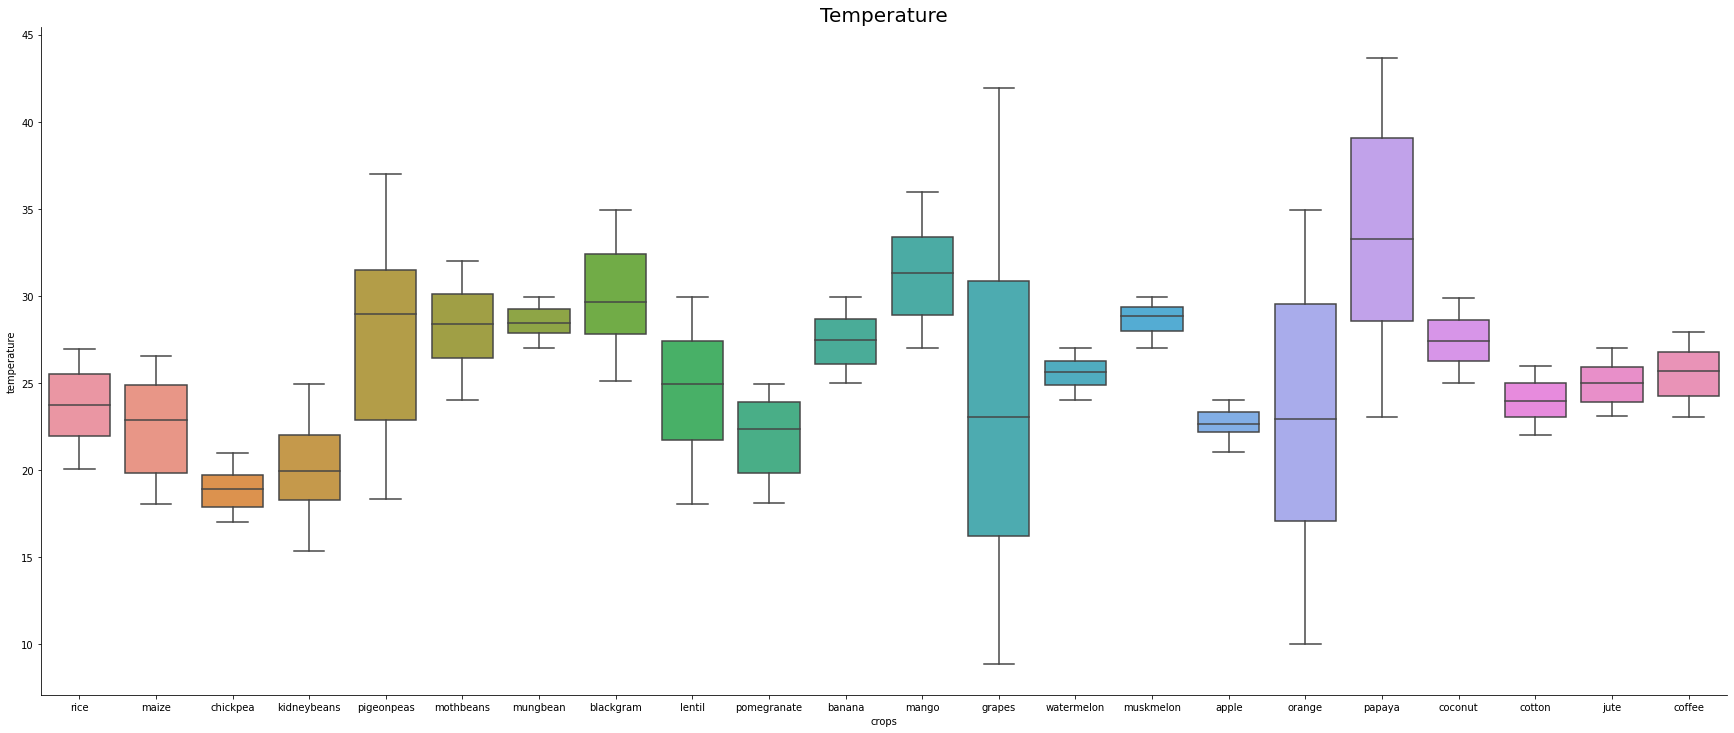

In [122]:
sns.catplot(data=df, x='crops', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

Papaya requires quite high Temperature among all the crops and Grapes have relatively large range of Temperature 

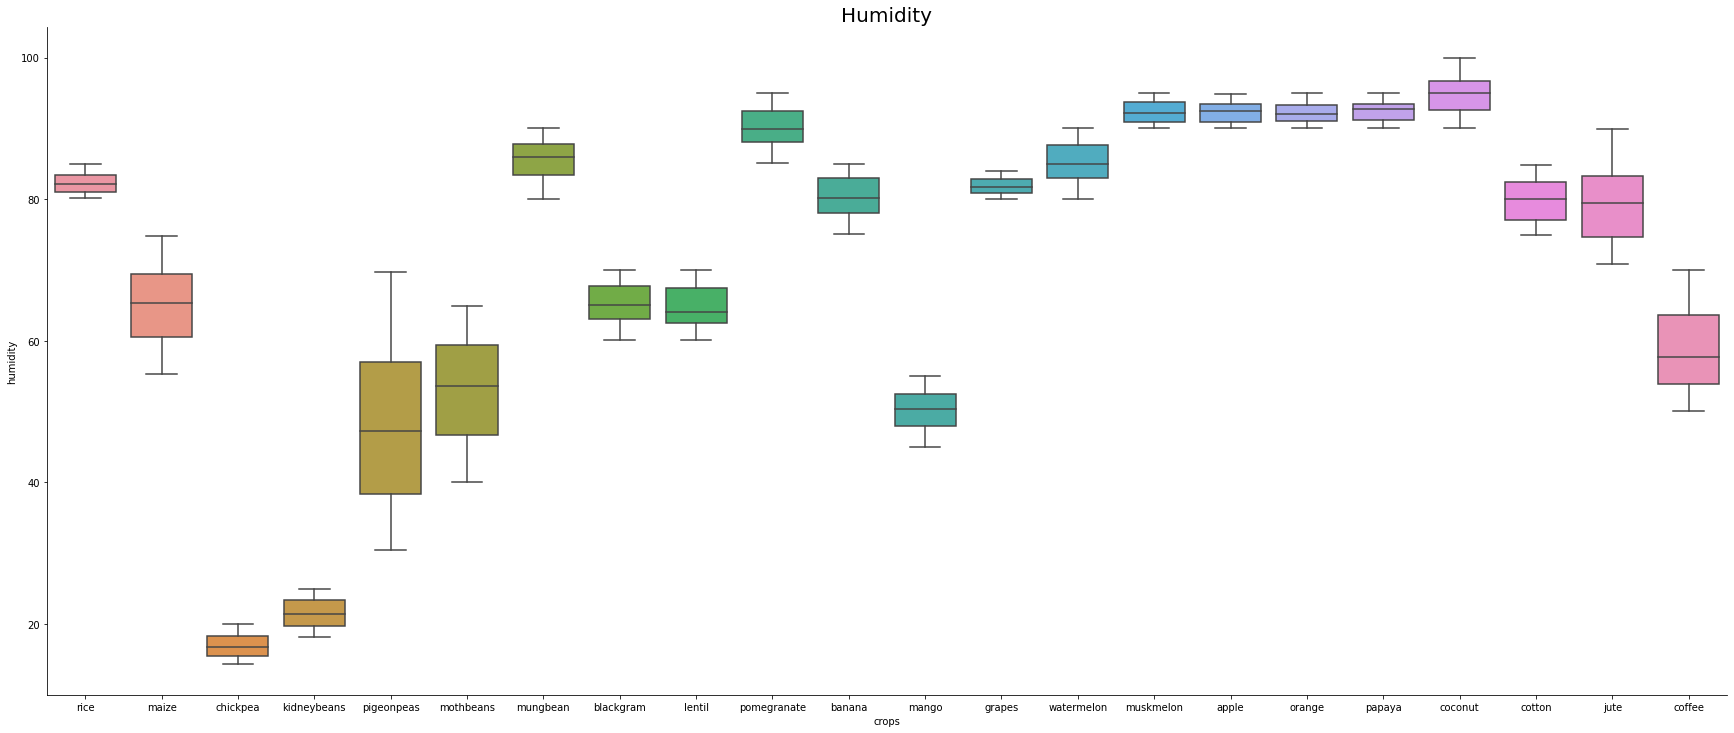

In [123]:
sns.catplot(data=df, x='crops', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

Most of the crops require moderate kind of humdity 

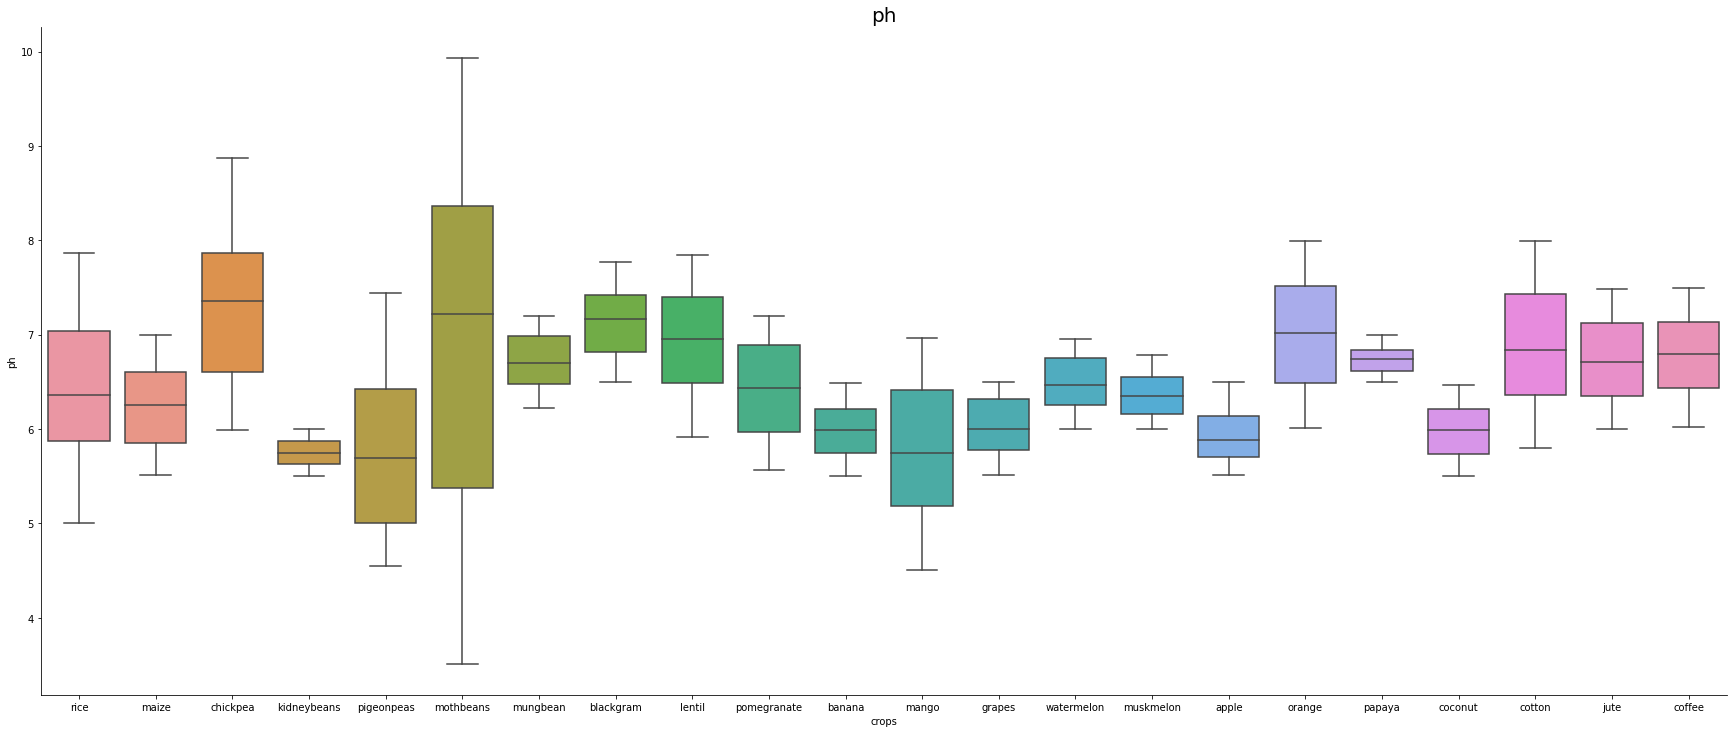

In [124]:
sns.catplot(data=df, x='crops', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("ph",size=20)
plt.show()

PH level required by the crops lies in range mean range of 5-8

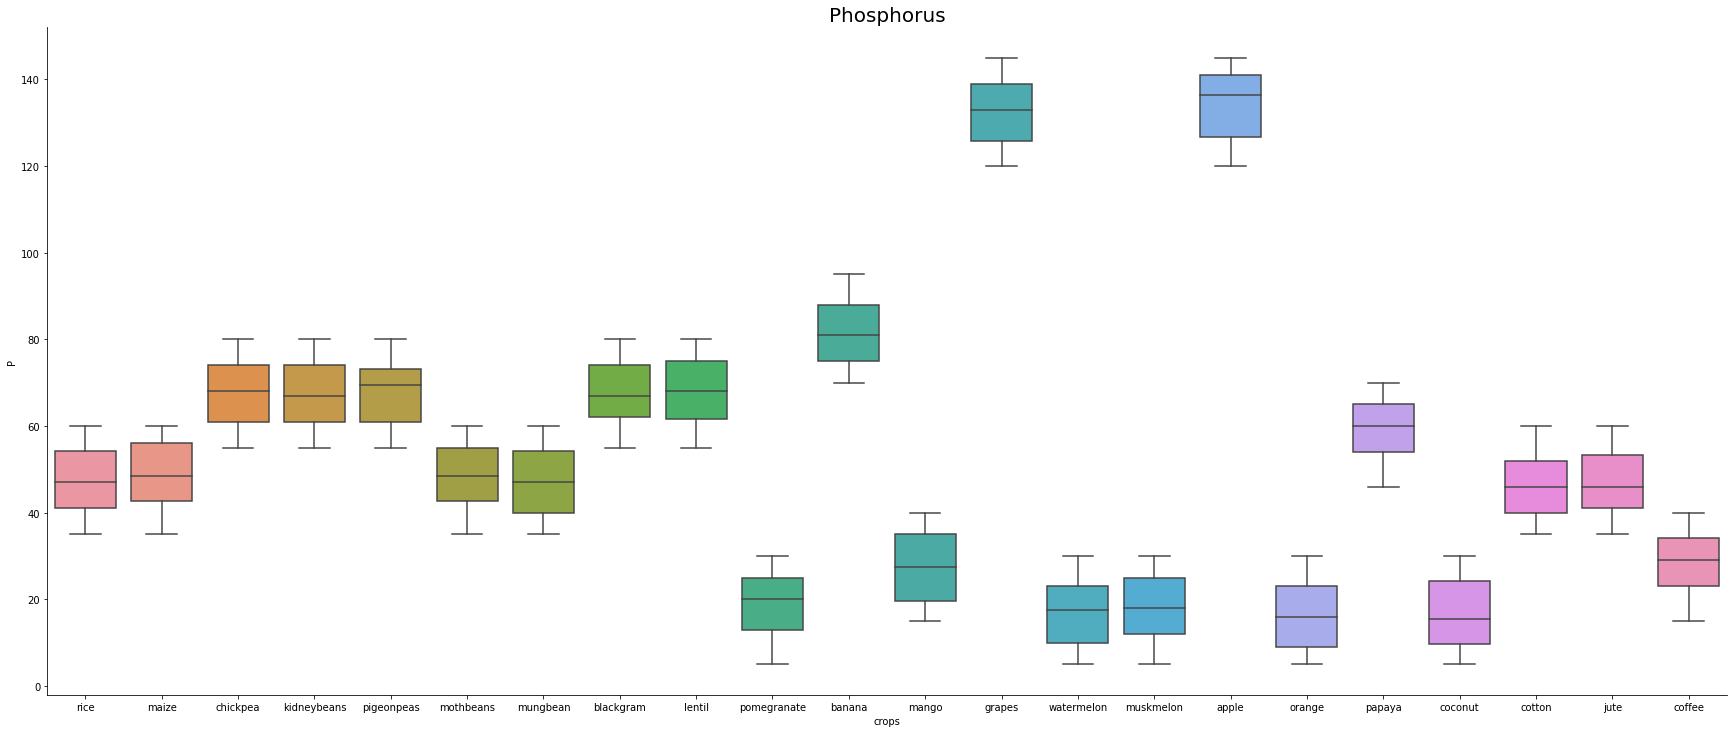

In [125]:
sns.catplot(data=df, x='crops', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

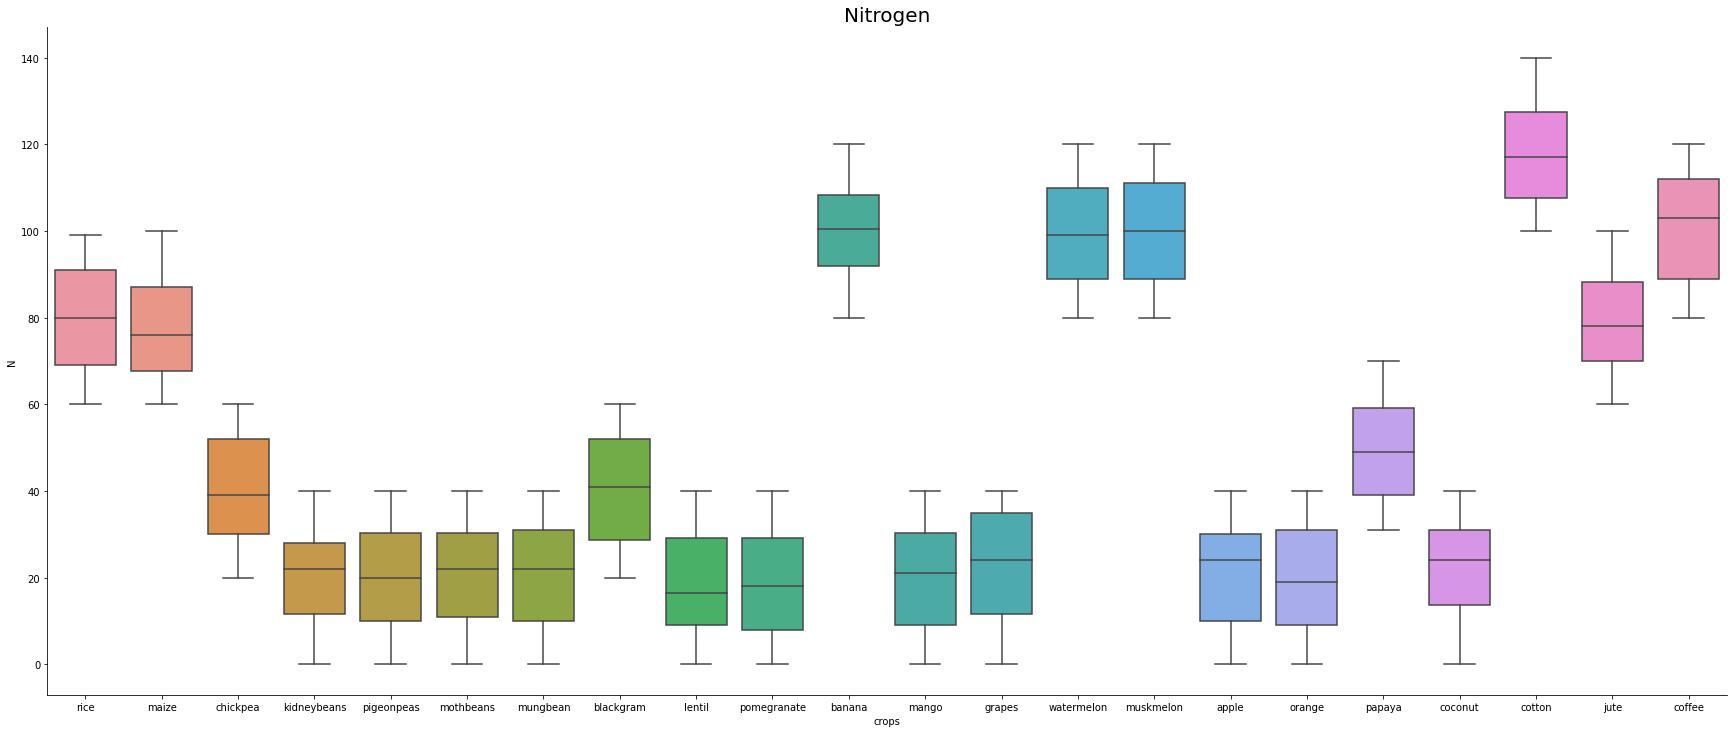

In [126]:
sns.catplot(data=df, x='crops', y='N', kind='box', height=10, aspect=20/8.27)
plt.title("Nitrogen",size=20)
plt.show()

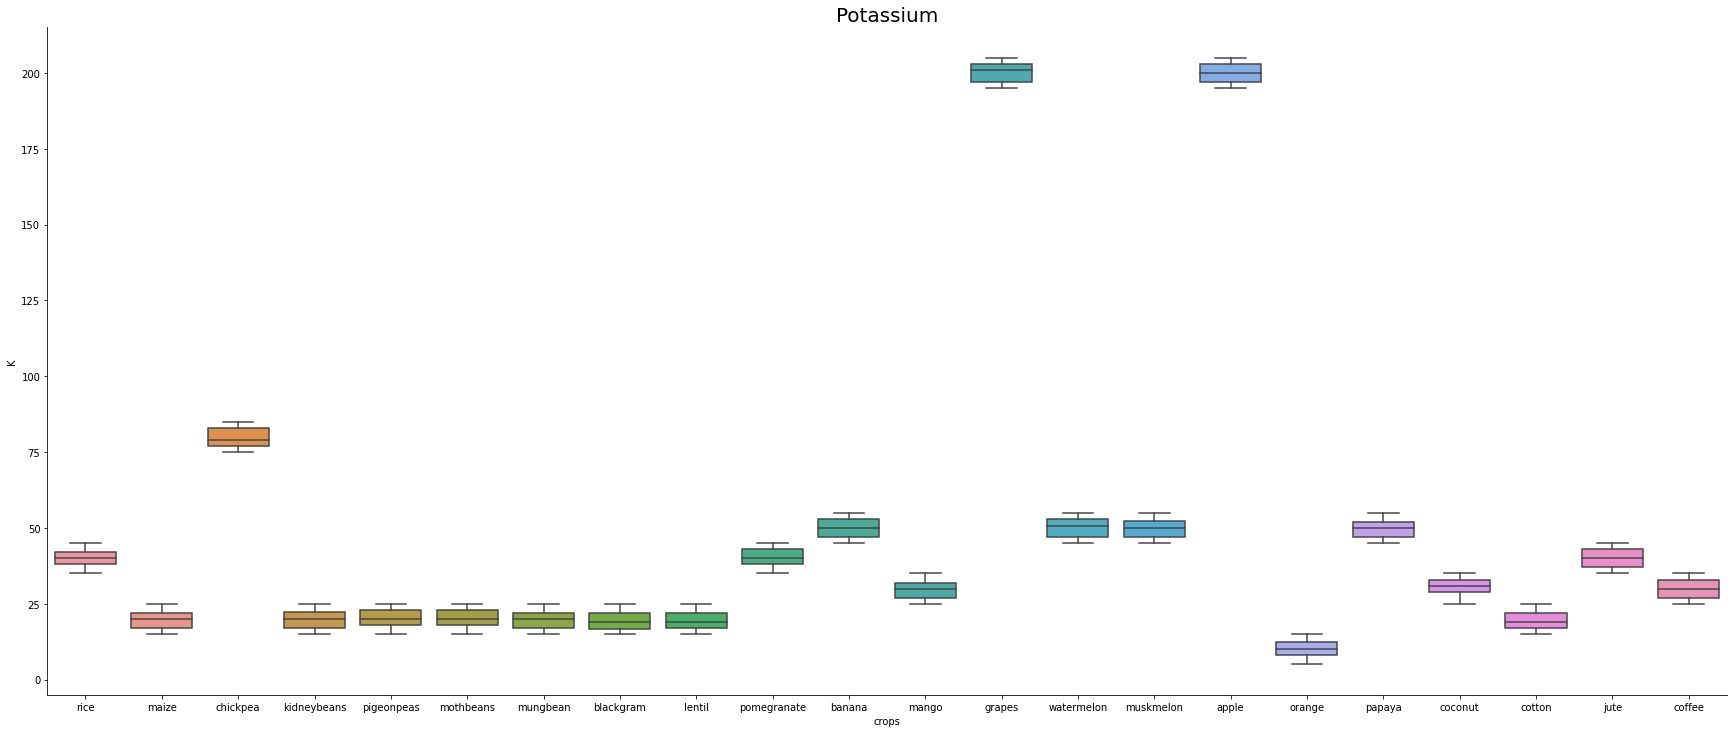

In [127]:
sns.catplot(data=df, x='crops', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

Pottasium required by the Gapes and Apple are the highest

In [27]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [128]:
import random

In [129]:
crop_summary = pd.pivot_table(df,index=['crops'],
                              aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
crops,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [130]:


crop_summary_N = crop_summary.sort_values(by='N', 
                                          ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [131]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [132]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [133]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [134]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=10, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=10, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=10, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=10, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=10, showarrow=False)])
fig.show()

In [135]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=10, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=10, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=10, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=10, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=10, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=10, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=10, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=10, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=10, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=10, showarrow=False)])
fig.show()

In [136]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<AxesSubplot:>

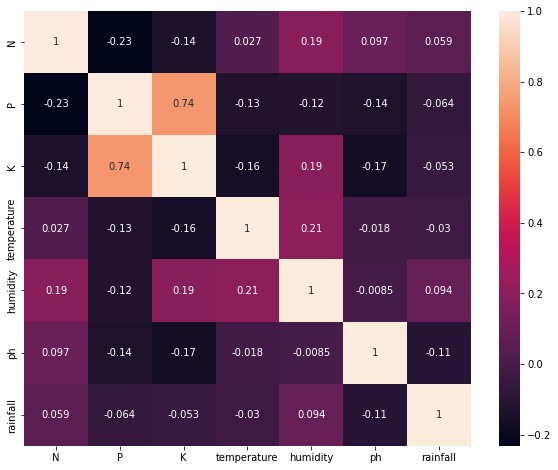

In [137]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

From the correlation Graph, it is clear that there hardly any relation between any of the components excxept a liitle relation is between temperatuire and humidity . Pottasium and Phosphorous have a strong relationship  . Otherwise there is null relationship 

### Separating features and target label

In [138]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['crops']
labels = df['crops']

In [139]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [140]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [146]:
score = np.mean(score)
print('Score :',score)

Score : 0.9140909090909091


### Saving trained Decision Tree model

In [147]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Support Vector Machine (SVM)

In [148]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [149]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
print('Score:',np.mean(score))

Score: 0.27999999999999997


# Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [151]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
print('Score:',np.mean(score))

Score: 0.9550000000000001


### Saving trained Logistic Regression model

In [152]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [154]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
print('Score :',np.mean(score))

Score : 0.9945454545454545


### Saving trained Random Forest model

In [155]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [156]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report

# Sample data
# Assuming you have Xtrain, Ytrain, Xtest, Ytest

# Encode the string class labels into numeric values
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Initialize and fit the XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Calculate accuracy and print classification report
x = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is: ", x)

acc.append(x)
model.append('XGBoost')

report = classification_report(Ytest, label_encoder.inverse_transform(predicted_values))
print(report)


XGBoost's Accuracy is:  0.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29

In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Sample data
# Assuming you have features and target

# Encode the string class labels into numeric values
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Initialize the XGBoost classifier
XB = xgb.XGBClassifier()

# Perform cross-validation
scores = cross_val_score(XB, features, target_encoded, cv=5)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.99318182 0.99318182 0.99318182 0.99090909 0.99090909]
Mean score: 0.9922727272727274


### Saving trained XGBoost model

In [158]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

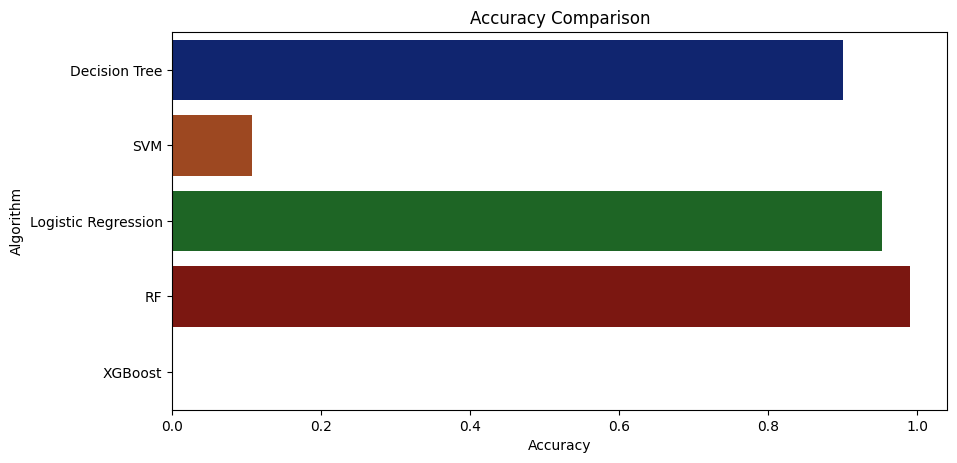

In [159]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [160]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.0


## Making a prediction

In [161]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [162]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


## 2.) Health Analysis of crops

### Motivation

```The Toxic Pesticides```

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

- We need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

### Data Description

| <font color='blue'><h2>Column Name</h2></font>                       | <font color='blue'><h2>Description</h2></font>                                                                                        |
| ------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------:|
| Id                       | UniqueID                                                                                                   | 
| Estimated_Insects_Count                          | Estimated insects count per square meter                                                                  | 
| Crop_Type                            | Category of Crop(0,1)                                                                                    | 
| Soil_Type                              | Category of Soil (0,1)                                                                                 | 
| Pesticide_Use_Category                               | Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)                                                                                   |
| Number_Doses_Week                               | Number of doses per week                                                                                   |
|Number_Weeks_Used                             |   Number of weeks used                   |
| Number_Weeks_Quit                             | Number of weeks quit                                          |
| Season                             | Season Category (1,2,3)                                         |
| <font color='red'>Crop_Damage</font>                            | Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)                                                                                      |

In [163]:
# Read the files

train_d=pd.read_csv('train_yaOffsB.csv')

test_d=pd.read_csv('test_pFkWwen.csv')

sample=pd.read_csv('sample_submission_O1oDc4H.csv')

In [164]:
print('Shape of training data is {}'.format(train_d.shape))

print('-------------'*5)

print('Shape of test data is {}'.format(test_d.shape))


Shape of training data is (88858, 10)
-----------------------------------------------------------------
Shape of test data is (59310, 9)


In [165]:
train_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [166]:
test_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
5,F00000015,851,0,1,1,0,0.0,0,2
6,F00000016,851,1,0,1,0,NaN,0,3
7,F00000019,1056,1,0,1,0,0.0,0,1
8,F00000025,1576,1,0,1,0,0.0,0,2
9,F00000026,1576,1,0,1,0,0.0,0,1


### Dataset Columns

In [169]:
print('Various columns in our dataset are: ',train_d.columns.tolist())

Various columns in our dataset are:  ['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Crop_Damage']


In [170]:
train_d.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [171]:
print('Healthy crops no. :',train_d['Crop_Damage'].value_counts()[0])

Healthy crops no. : 74238


In [172]:
print('Damaged crops due to pesticides. :',train_d['Crop_Damage'].value_counts()[2])

Damaged crops due to pesticides. : 2313


In [173]:
print('Damaged crops due to other reasons :',train_d['Crop_Damage'].value_counts()[1])

Damaged crops due to other reasons : 12307


In [174]:
## Missing value in the dataset

train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [175]:
test_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

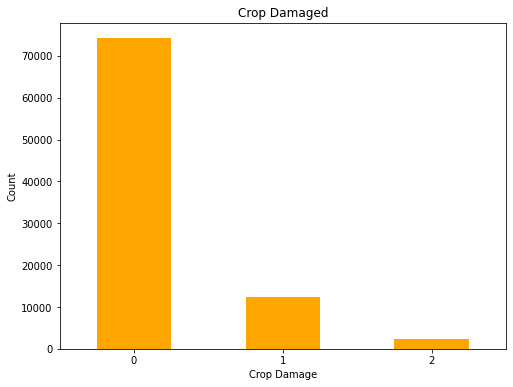

In [176]:
plt.figure(figsize=(8, 6))
train_d['Crop_Damage'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Crop Damage')
plt.ylabel('Count')
plt.title('Crop Damaged')
plt.xticks(rotation=0)
plt.show()

#### # Crop type which is more prone to pests

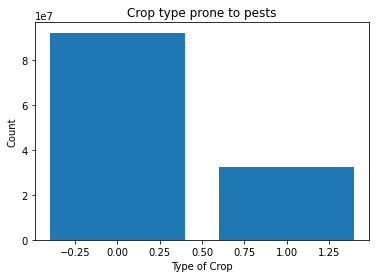

In [177]:
crop_type_insects = train_d.groupby('Crop_Type')['Estimated_Insects_Count'].sum()


plt.bar(crop_type_insects.index, crop_type_insects.values)
plt.xlabel('Type of Crop')
plt.ylabel('Count')
plt.title('Crop type prone to pests')
plt.show()


```Crop type -0``` is more prone to get attacked by the insects. 

> So it requires more frequent pestisides weeks.

#### Soil type which require more pestiside

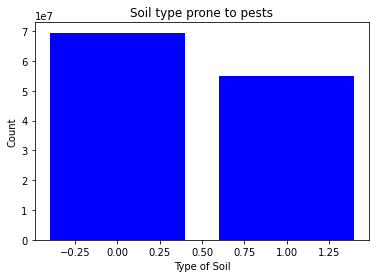

In [178]:
soil_type_insects = train_d.groupby('Soil_Type')['Estimated_Insects_Count'].sum()

plt.bar(soil_type_insects.index, soil_type_insects.values, color='blue')
plt.xlabel('Type of Soil')
plt.ylabel('Count')
plt.title('Soil type prone to pests')
plt.show()


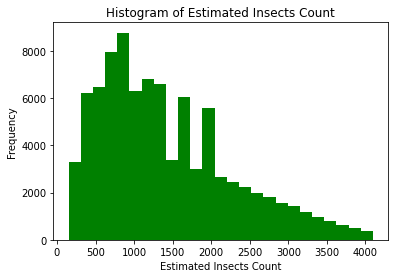

In [181]:
plt.hist(train_d['Estimated_Insects_Count'], bins=25, color='green')
plt.xlabel('Estimated Insects Count')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Insects Count')
plt.show()


#### Check the presence of outliers in Estimated_Insects_Count

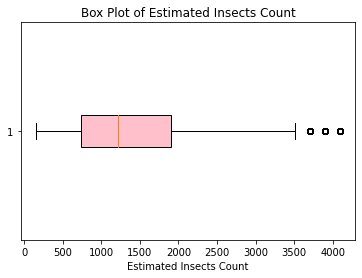

In [182]:
plt.boxplot(train_d['Estimated_Insects_Count'], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.xlabel('Estimated Insects Count')
plt.title('Box Plot of Estimated Insects Count')
plt.show()


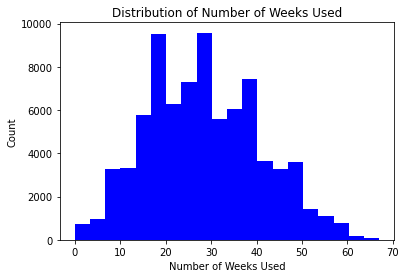

In [183]:
plt.hist(train_d['Number_Weeks_Used'], bins=20, color='blue')
plt.xlabel('Number of Weeks Used')
plt.ylabel('Count')
plt.title('Distribution of Number of Weeks Used')
plt.show()


### Join the trian and test data together 


In [184]:
# Join the trian and test data together 

train_d['train_or_test']='train'
test_d['train_or_test']='test'
df=pd.concat([train_d,test_d])

In [185]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,train_or_test
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [186]:
df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
train_or_test                  0
dtype: int64

In [187]:
df['Number_Weeks_Used'].mode()[0]

20.0

In [188]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mode()[0])

In [189]:
df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used              0
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
train_or_test                  0
dtype: int64

In [190]:
# Seperate the train and test data before training.

train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [191]:
train.drop('ID',axis=1,inplace=True)
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


In [192]:
train.shape

(88858, 9)

In [193]:
test.drop(['ID','Crop_Damage'],axis=1,inplace=True)
test.head()
test.shape

(59310, 8)

### Convert to X and Y

In [194]:
X_train, Y = train.drop(["Crop_Damage"], axis=1).values, train["Crop_Damage"].values
X_test = test.values

X_train.shape, Y.shape, X_test.shape

((88858, 8), (88858,), (59310, 8))

### Model creation

In [195]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [196]:
num_class1, num_class2, num_class3 = Counter(Y)[0], Counter(Y)[1], Counter(Y)[2]

print(num_class1)
print(num_class2)
print(num_class3)

74238
12307
2313


In [197]:
Counter(Y)

Counter({0.0: 74238, 1.0: 12307, 2.0: 2313})

## LGBM

In [198]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    num_class1, num_class2, num_class3 = Counter(y_train)[0], Counter(y_train)[1], Counter(y_train)[2]
    sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 152003, number of used features: 8
[LightGBM] [Info] Start training from score -0.677410
[LightGBM] [Info] Start training from score -0.792144
[LightGBM] [Info] Start training from score -3.239165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Make final prediction using LGBM

In [ ]:
sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
x_train, y_train = sm.fit_resample(x_train, y_train)

model1 = LGBMClassifier(random_state=27, max_depth=6, n_estimators=800,num_leaves=50)
model1.fit(X_train, Y)
preds = model1.predict_proba(X_test)

In [200]:
preds[0]

array([3.15318238e-01, 6.84519077e-01, 1.62684375e-04])

### Making prediction using Catboost

In [ ]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    model = CatBoostClassifier(random_state=27, max_depth=4, task_type="CPU", devices="0:1", n_estimators=1000, verbose=500)
    model.fit(x_train, y_train)
    preds_t = model.predict(x_test)
    score = f1_score(y_test, preds_t, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.098348
0:	learn: 0.9826007	total: 32.5ms	remaining: 32.5s
500:	learn: 0.4113565	total: 15.5s	remaining: 15.4s
999:	learn: 0.4053388	total: 30.6s	remaining: 0us
0.8045185465046036
Learning rate set to 0.098348
0:	learn: 0.9827899	total: 32ms	remaining: 32s
500:	learn: 0.4134770	total: 15.4s	remaining: 15.3s
999:	learn: 0.4071673	total: 30.6s	remaining: 0us
0.8062685705490381
Learning rate set to 0.098348
0:	learn: 0.9823135	total: 34.1ms	remaining: 34s
500:	learn: 0.4115316	total: 15.2s	remaining: 15.1s
999:	learn: 0.4055016	total: 30s	remaining: 0us
0.7989270149553426
Learning rate set to 0.098348
0:	learn: 0.9826310	total: 32.2ms	remaining: 32.2s


In [96]:
model2 = CatBoostClassifier(random_state=27, task_type="CPU", devices="0:1", n_estimators=1000, max_depth=4, verbose=500)
model2.fit(X_train, Y)
preds1 = model2.predict_proba(X_test)

Learning rate set to 0.099473
0:	learn: 0.9813381	total: 30.4ms	remaining: 30.3s
500:	learn: 0.4129164	total: 13.6s	remaining: 13.5s
999:	learn: 0.4077503	total: 26s	remaining: 0us


In [97]:
preds1[0]

array([0.17371915, 0.75411741, 0.07216344])

## Using XGBoost Model

In [98]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import f1_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = []

for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    model = xgb.XGBClassifier(random_state=27, max_depth=4, n_estimators=1000, verbosity=1)
    model.fit(x_train, y_train)
    preds3 = model.predict(x_test)
    score = f1_score(y_test, preds3, average="weighted")
    scores.append(score)
    print(score)

print("Average F1 Score:", sum(scores) / len(scores))


0.8106781489533933
0.810141380678633
0.8063803229017694
0.8088467832427993
0.8112997145730974
Average F1 Score: 0.8094692700699385


In [99]:
predictions = list()
cb_weight=0.6 # Catboost
lb_weight=0.4 # LGBM
for i, j in zip(preds, preds1):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]),
          (cb_weight * i[2]) + (lb_weight * j[2])]
    predictions.append(xx)
# print(predictions[:10])
preds_ensemble=np.argmax(predictions,axis=1)

In [100]:
preds_ensemble[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [101]:
sample['Crop_Damage']=preds_ensemble
sample.to_csv('submission_ensemble1.csv',index=False,encoding='utf-8')